<a href="https://colab.research.google.com/github/SURIYA-po/Data-Analysis/blob/main/DataAnalysisforIpl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/IPL.csv")
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [ ]:
df.shape

(74, 20)

Now lets see how many columns have null value

In [ ]:
df.isnull().sum()

,0
match_id,0
date,0
venue,0
team1,0
team2,0
stage,0
toss_winner,0
toss_decision,0
first_ings_score,0
first_ings_wkts,0


which team won the most mathces?

match_winner
Gujarat      12
Rajasthan    10
Banglore      9
Lucknow       9
Punjab        7
Delhi         7
Kolkata       6
Hyderabad     6
Chennai       4
Mumbai        4
Name: count, dtype: int64


Text(0.5, 1.0, 'most match win by team')

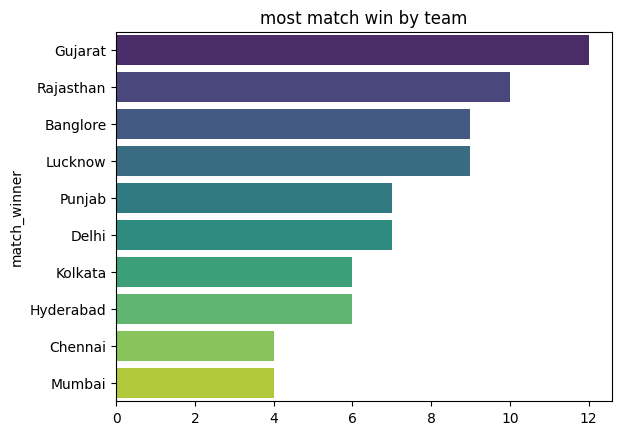

In [ ]:
match_wins = df['match_winner'].value_counts()
print(match_wins)
sns.barplot(y=match_wins.index, x=match_wins.values,palette="viridis")
plt.title("most match win by team")

Toss decision trend

<Axes: xlabel='toss_decision', ylabel='count'>

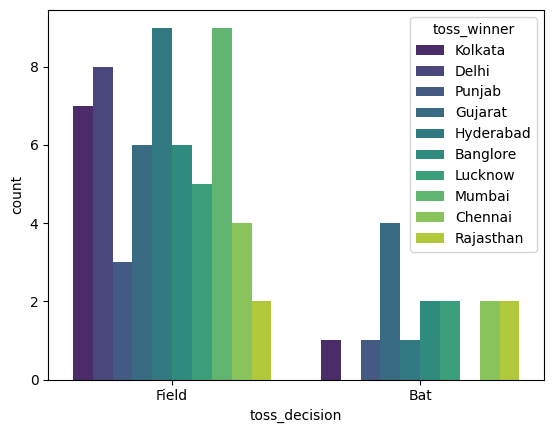

In [ ]:
sns.countplot(x="toss_decision", hue="toss_winner", data=df, palette="viridis")

Toss winners vs match winner

In [ ]:
count = df[df["toss_winner"]==df["match_winner"]]["match_id"].count()

In [ ]:
percentage = (count/df.shape[0])*100
print(percentage.round(2))

48.65


How do teams win?(run vs wicket)

np.int64(37)

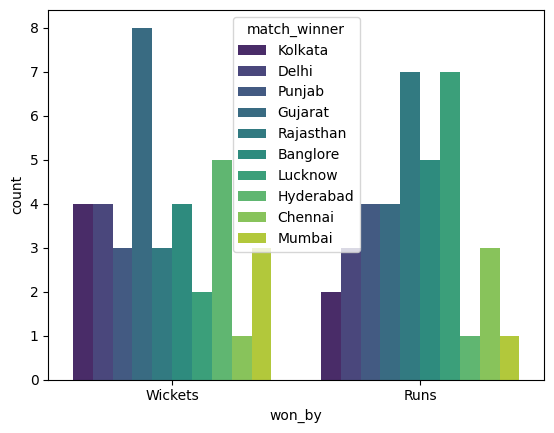

In [ ]:
df.head()
sns.countplot(x="won_by", hue="match_winner", data=df, palette="viridis")
df[df["won_by"]=="Wickets"]["match_winner"].value_counts().sum()


Most player of the match awards

In [ ]:
count = df["player_of_the_match"].value_counts().head(10)

Text(0.5, 1.0, 'player of the match')

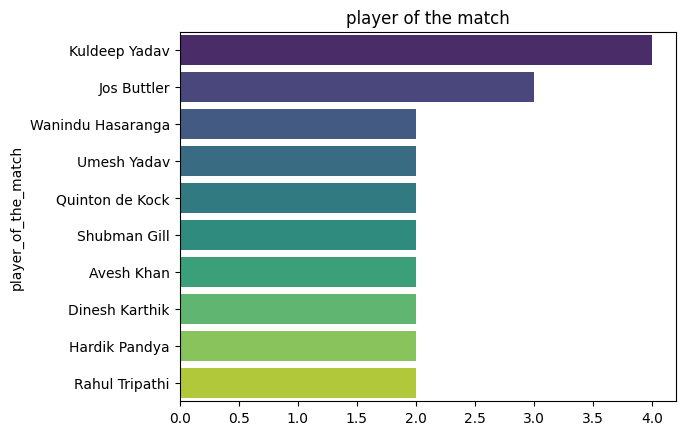

In [ ]:
sns.barplot(y=count.index, x=count.values, palette="viridis")
plt.title("player of the match")

Top scoreres

Text(0.5, 1.0, 'top scorer')

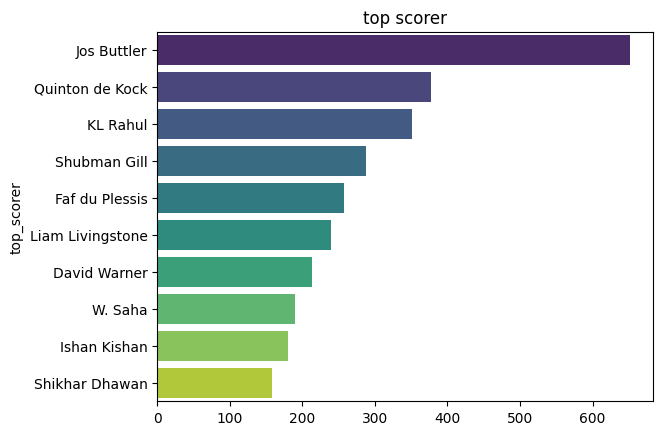

In [ ]:
high = df.groupby("top_scorer")["highscore"].sum().sort_values(ascending=False).head(10)
sns.barplot(y=high.index, x=high.values, palette="viridis")
plt.title("top scorer")

best_bowling figures

In [ ]:
df["highest_wickets"]= df["best_bowling_figure"].apply(lambda x: x.split('--')[0])
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,highest_wickets
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,...,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20,3
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,...,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18,3
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,...,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59,2
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,...,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25,3
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,...,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22,3


In [ ]:
df["highest_wickets"] = df["highest_wickets"].astype(int)

Text(0.5, 1.0, 'best bowling')

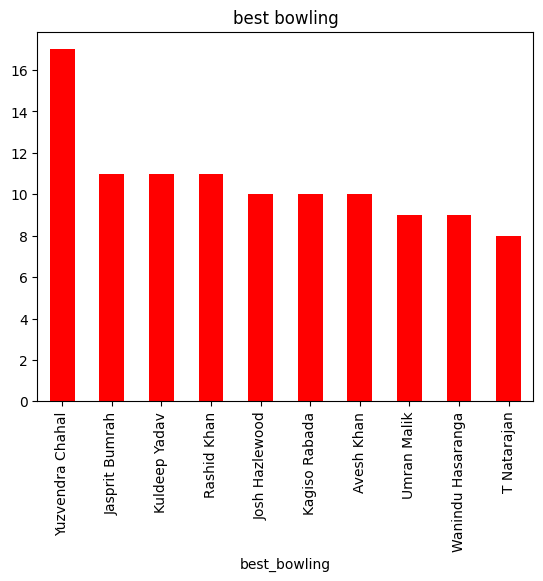

In [ ]:
top_bowlers= df.groupby("best_bowling")["highest_wickets"].sum().sort_values(ascending=False).head(10)
top_bowlers.plot(kind="bar", color="red")
plt.title("best bowling")

who wont the highest margin by runs ?

In [1]:
won_by_runs = df[df["won_by"]=="Runs"].sort_values(by="won_by_runs", ascending=False).head(10)
won_by_runs


NameError: name 'df' is not defined